#informations sur le dataset Mosmed : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7943389/

#https://healthcaresummit.ieee.org/wp-content/uploads/sites/362/2021/08/MOSMEDDATA_CHEST-CT-SCANS-WITH-COVID-19-RELATED-FINDINGS-DATASET.pdf

#page githui du projet : https://github.com/ClinicalAI/3DGAN_CT_Segmentation

# Recherche scientifique : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9419627/pdf/main.pdf

# dataset torrent complet (avec CT_0) : https://academictorrents.com/details/f2175c4676e041ea65568bb70c2bcd15c7325fd2

# Module lungmask : https://github.com/JoHof/lungmask
# partie lungmask.utils : https://github.com/JoHof/lungmask/blob/master/lungmask/utils.py

les 'masks' sont de 255 à 304 inclus

CT-0 (/studies/CT-0 directory): normal lung tissue, no CT-signs of viral pneumonia.
CT-1 (/studies/CT-1 directory): several ground-glass opacifications, involvement of lung parenchyma is less than 25%.
CT-2 (/studies/CT-2 directory): ground-glass opacifications, involvement of lung parenchyma is between 25 and 50%.
CT-3 (/studies/CT-3 directory): ground-glass opacifications and regions of consolidation, involvement of lung parenchyma is between 50 and 75%.
CT-4 (/studies/CT-4 directory): diffuse ground-glass opacifications and consolidation as well as reticular changes in lungs. Involvement of lung parenchyma exceeds 75%.

il y a des erreurs dans ce notebook qui ont été corrigées dans une version du notebook de walidhirouche@gmail.com

après le premier preprocessing, on se retrouve avec la liste : CT_ALL_DATA qui contient à priori des images CT mais qui ont des masks correspondants (futur ⏫: ce sont les données de test, car effectivement dans le dataset, il y a 49 masks ~ 50) et donc après la définition de beaucoup d'autres fonctions et classes, la fonction suivante qui a été exécutée est ExtractLungMask(CT-1-DATA)

après le premier preprocessing, on se retrouve avec la liste : CT_ALL_DATA qui contient à priori des images CT mais qui ont des masks correspondants, et donc après la définition de beaucoup d'autres fonctions et classes, la fonction suivante qui a été exécutée est ExtractLungMask(CT-1-DATA)
---
#__chemin inverse :__
## création des masks

\*CT_ALL_DATA\
-> volume, spacing = read_nifti_file(CT_ALL_DATA) {nifti(.nfi) to nparrays}\
-> volume = resample_ct_pixels(volume,spacing) {}\
->volume = reshpe_pic(volume) {rotation de l'ordre des matrices qui n'est pas effectué, donc sert à rien}\
-> CT_ALL_DATA_LungMask_1 = apply_1(volume) {création des masques}\
\
**volume = inimg_raw\
-> inimg_raw = lungmask.utils.preprocess(inimg_raw) {Preprocesses the image by clipping, cropping and resizing. Clipping at -1024 and 600 HU, cropping to the body}\
-> tvolslices "transformed volume slices" {matrices numpy scalées à 0 - 1}\
-> torch_ds_val "toch_dataset_validation" = lungmask.utils.LungLabelsDS_inf(tvolslices){Création d'un chargeur de données, qui est un itérateur sur un ensemble de donnée}\
-> dataloader_val = torch.utils.data.DataLoader(torch_ds_val) {pour itérer sur les données de validation }\
-> timage_res "transformed iamge result" = for X in dataloader_val : model(x) {on envoie chaque slice au model défini avec une autre fonction qui est un modèle issu de lungmask (unet) pour renvoyer un tableau de ségmentation des poumons }\
-> outmask = lungmask.utils.postrocessing(timage_res) {version améliorée sans les petites imperfections, ou les artefacts, qui est une longue matrice 240xgrand\
-> outmask = np.asarray(reshape_mask(outmask)) {pour revenir au format plusieurs tableaux de 240x24x en uint8}\

enfin 🥳

-> matplotlib pour afficher certains masks

## extraction du poumon seul

on utilise les masks qu'on a déjà créé, pour fait une sorte de soustraction où chaque pixel du mask qui est 0 devient 0 pour l'image du poumon

\*patient_ct_lung_seg
ct_lung_seg = apply_lung_mask(CT_Images, CT_ALL_DATA_LungMask_1)
patient_ct_lung_seg = ExtrctRealPart(ct_lung_seg)

## extraction des CT masks (les masks des parties infectées)
depuis les dossier des masks, on preprocess les images .nii -> np.array (rescaling, resizing, ...)

# Sortie finale:
CT_Images             ->  Whole lung   (image original coloré)

CT_ALL_DATA_LungMask_1  ->  Mask of lung (deux couleurs poumon)

patient_ct_lung_seg   ->  Masked lung  (que le poumon mais coloré)

Mask_Images           ->  Infection of lung (que l'infection deux couleurs)







# Mounting Gdrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [2]:
####### upload the Extractor Lungmask
!pip install git+https://github.com/JoHof/lungmask
!pip install SimpleITK
!pip install nibabel


  Cloning https://github.com/JoHof/lungmask to /tmp/pip-req-build-433iq8px
  Running command git clone --filter=blob:none --quiet https://github.com/JoHof/lungmask /tmp/pip-req-build-433iq8px
  Resolved https://github.com/JoHof/lungmask to commit e48f2cfa96cdfdea39c0aee36e8d57bfa503b048
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 14.7 MB/s eta 0:00:00
  Created wheel for lungmask: filename=lungmask-0.2.18-py3-none-any.whl size=19880 sha256=9f79cb0d02e4f08683dc1ac322e5da722bf27754ed92ba54ffafd77cfbfa7d1a
  Stored in directory: /tmp/pip-ephem-wheel-cache-2be9r6x_/wheels/e8/e3/e6/401a561962a4c16d3fa4066cb6a7f0

In [4]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import nibabel as nib
from skimage.transform import resize
from scipy import ndimage
import scipy
from tqdm import tqdm
import scipy.ndimage as ndimage
import skimage.measure
from torch.utils.data import Dataset
import sys
import SimpleITK as sitk
import pydicom as pyd
import logging
import fill_voids
import skimage.morphology
import argparse
import pkg_resources
import torch
import lungmask
from lungmask import utils
import SimpleITK as sitk
import warnings
import skimage
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Loading The Raw Data  

In [30]:
CT_0_DATA = ['/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0855.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0856.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0857.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0858.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0859.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0860.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0861.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0862.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0863.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0864.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0865.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0866.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0867.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0868.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0869.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0870.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0871.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0872.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0873.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0874.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0875.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0876.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0877.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0878.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0879.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0880.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0881.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0882.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0883.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0884.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0885.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0886.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0887.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0888.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0889.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0890.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0891.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0892.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0893.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0894.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0895.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0896.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0897.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0898.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0899.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0900.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0901.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0902.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0903.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0904.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0905.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0906.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0907.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0908.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0909.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0910.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0911.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0912.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0913.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0914.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0915.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0916.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0917.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0918.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0919.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0920.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0921.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0922.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0923.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0924.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0925.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0926.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0927.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0928.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0929.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0930.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0931.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0932.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0933.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0934.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0935.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0936.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0937.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-1/study_0938.nii.gz', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0939.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0940.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0941.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0942.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0943.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0944.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0945.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0946.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0947.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0948.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0949.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0950.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0951.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0952.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0953.nii', '/content/drive/MyDrive/Mosmed Dataset 1100 samples/Data/CT-2/study_0954.nii']


# Extract Whole CT Images

In [9]:
def read_nifti_file(filepath):
    """Read and load volume"""

    # Read file
    scan = nib.load(filepath)
    sx, sy, sz = scan.header.get_zooms()

    # Get raw data
    scan = scan.get_fdata()
    scan = ndimage.rotate(scan,-90, reshape=False)
    return scan , np.array([sx, sy, sz])


def normalize(volume):
    """Normalize the volume"""
    min = -1000
    max = 400
    volume[volume < min] = min
    volume[volume > max] = max
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume


def resize_volume(img):
    """Resize across z-axis"""

    # Set the desired depth
    desired_depth = 50
    desired_width = 128
    desired_height = 128

    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]

    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height

    # Rotate
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), mode='constant')
    return img


def resample_ct_pixels(ct_pixels, ct_pixel_spacing, new_spacing=[2, 2, 8]):
    resize_factor = ct_pixel_spacing / new_spacing
    resize_factor[2]=1
    new_real_shape = ct_pixels.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / ct_pixels.shape
    new_spacing = ct_pixel_spacing / real_resize_factor
    ct_resampled = scipy.ndimage.interpolation.zoom(ct_pixels, real_resize_factor, mode='constant')
    ct_resampled = resize(ct_resampled, (128,128, 32),anti_aliasing=True , order=5,mode='constant')
    return ct_resampled


def process_scan(path):
    """Read and resize volume"""
    volume,spacing = read_nifti_file(path)
    volume = resample_ct_pixels(volume,spacing)
    volume = normalize(volume)
    volume = np.reshape(volume,(volume.shape[0],volume.shape[1],32))
    return volume

def process_scan_mask(path):
    """Read and resize volume"""
    volume,spacing = read_nifti_file(path)
    volume = resample_ct_pixels(volume,spacing)
    volume = np.reshape(volume,(volume.shape[0],volume.shape[1],32))
    volume = np.where(volume>=0.5,1,0)
    return volume




In [31]:
#### extract 32 slice of each patient
def EqualSize(ListData):
        EqualSizeList = [0]*len(ListData)
        for i in tqdm(range(len(ListData))):
            print(ListData[i].shape)
            extra_size=ListData[i].shape[2] - 28
            start=int(extra_size/2)
            EqualSizeList[i]=ListData[i][:,:,start:(start+28)]
        return EqualSizeList


def norm_func(input_image):
    new_max=  500
    new_min = -1023
    old_max=  input_image.max()
    old_min = input_image.min()
    a= (input_image - old_min) / (old_max - old_min)
    a= a*(new_max- new_min)  + new_min
    return a



def reshpe_pic(img_insert):
    img = np.zeros([img_insert.shape[2],img_insert.shape[0],img_insert.shape[1]])
    for i in range(img_insert.shape[2]):
        img[i,:,:] = img_insert[:,:,i]
    return img

#################### extract CT images
CT_0_Images = [process_scan(path) for path in tqdm(CT_0_DATA)]
#print("\nA sample size: ",CT_0_Images[0].shape)
#CT_OTHERS_Images = [process_scan(path) for path in tqdm(CT_OTHERS_DATA)]
#print("\nA sample size: ",CT_OTHERS_Images[0].shape)

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-9-e9791a32296e>:58: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  ct_resampled = scipy.ndimage.interpolation.zoom(ct_pixels, real_resize_factor, mode='constant')
100%|██████████| 100/100 [12:21<00:00,  7.41s/it]


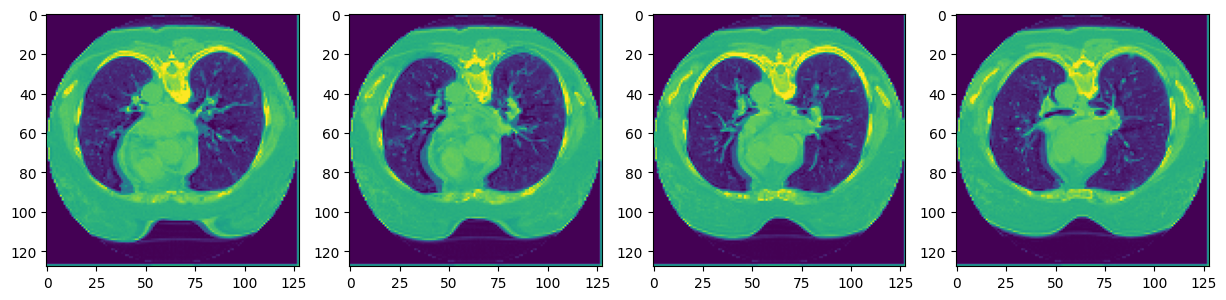

In [32]:
# print(abnormal_scans.shape)
plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(1,4,(i+1))
    plt.imshow(CT_0_Images[0][:,:,15+i])
    plt.subplot(1,4,(i+1))
    plt.imshow(CT_0_Images[0][:,:,15+i])


# Extract The Lung Mask

In [16]:
def preprocess(img, label=None, resolution=[192, 192]):
    imgmtx = np.copy(img)
    lblsmtx = np.copy(label)

    imgmtx[imgmtx < -1024] = -1024
    imgmtx[imgmtx > 600] = 600
    cip_xnew = []
    cip_box = []
    cip_mask = []
    for i in range(imgmtx.shape[0]):
        if label is None:
            (im, m, box) = crop_and_resize(imgmtx[i, :, :], width=resolution[0], height=resolution[1])
        else:
            (im, m, box) = crop_and_resize(imgmtx[i, :, :], mask=lblsmtx[i, :, :], width=resolution[0],
                                           height=resolution[1])
            cip_mask.append(m)
        cip_xnew.append(im)
        cip_box.append(box)
    if label is None:
        return np.asarray(cip_xnew), cip_box
    else:
        return np.asarray(cip_xnew), cip_box, np.asarray(cip_mask)


def simple_bodymask(img):
    maskthreshold = -500
    oshape = img.shape
    img = ndimage.zoom(img, 128/np.asarray(img.shape), order=0)
    bodymask = img > maskthreshold
    bodymask = ndimage.binary_closing(bodymask)
    bodymask = ndimage.binary_fill_holes(bodymask, structure=np.ones((3, 3))).astype(int)
    bodymask = ndimage.binary_erosion(bodymask, iterations=2)
    bodymask = skimage.measure.label(bodymask.astype(int), connectivity=1)
    regions = skimage.measure.regionprops(bodymask.astype(int))
    if len(regions) > 0:
        max_region = np.argmax(list(map(lambda x: x.area, regions))) + 1
        bodymask = bodymask == max_region
        bodymask = ndimage.binary_dilation(bodymask, iterations=2)
    real_scaling = np.asarray(oshape)/128
    return ndimage.zoom(bodymask, real_scaling, order=0)


def crop_and_resize(img, mask=None, width=192, height=192):
    bmask = simple_bodymask(img)
    # img[bmask==0] = -1024 # this line removes background outside of the lung.
    # However, it has been shown problematic with narrow circular field of views that touch the lung.
    # Possibly doing more harm than help
    reg = skimage.measure.regionprops(skimage.measure.label(bmask))
    if len(reg) > 0:
        bbox = np.asarray(reg[0].bbox)
    else:
        bbox = (0, 0, bmask.shape[0], bmask.shape[1])
    img = img[bbox[0]:bbox[2], bbox[1]:bbox[3]]
    img = ndimage.zoom(img, np.asarray([width, height]) / np.asarray(img.shape), order=1)
    if not mask is None:
        mask = mask[bbox[0]:bbox[2], bbox[1]:bbox[3]]
        mask = ndimage.zoom(mask, np.asarray([width, height]) / np.asarray(mask.shape), order=0)
        # mask = ndimage.binary_closing(mask,iterations=5)
    return img, mask, bbox


def reshape_mask(mask, tbox, origsize):
    res = np.ones(origsize) * 0
    resize = [tbox[2] - tbox[0], tbox[3] - tbox[1]]
    imgres = ndimage.zoom(mask, resize / np.asarray(mask.shape), order=0)
    res[tbox[0]:tbox[2], tbox[1]:tbox[3]] = imgres
    return res


class LungLabelsDS_inf(Dataset):
    def __init__(self, ds):
        self.dataset = ds

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx, None, :, :].astype(float)


def read_dicoms(path, primary=True, original=True):
    allfnames = []
    for dir, _, fnames in os.walk(path):
        [allfnames.append(os.path.join(dir, fname)) for fname in fnames]

    dcm_header_info = []
    dcm_parameters = []
    unique_set = []  # need this because too often there are duplicates of dicom files with different names
    i = 0
    for fname in tqdm(allfnames):
        filename_ = os.path.splitext(os.path.split(fname)[1])
        i += 1
        if filename_[0] != 'DICOMDIR':
            try:
                dicom_header = pyd.dcmread(fname, defer_size=100, stop_before_pixels=True, force=True)
                if dicom_header is not None:
                    if 'ImageType' in dicom_header:
                        if primary:
                            is_primary = all([x in dicom_header.ImageType for x in ['PRIMARY']])
                        else:
                            is_primary = True

                        if original:
                            is_original = all([x in dicom_header.ImageType for x in ['ORIGINAL']])
                        else:
                            is_original = True

                        # if 'ConvolutionKernel' in dicom_header:
                        #     ck = dicom_header.ConvolutionKernel
                        # else:
                        #     ck = 'unknown'
                        if is_primary and is_original and 'LOCALIZER' not in dicom_header.ImageType:
                            h_info_wo_name = [dicom_header.StudyInstanceUID, dicom_header.SeriesInstanceUID,
                                              dicom_header.ImagePositionPatient]
                            h_info = [dicom_header.StudyInstanceUID, dicom_header.SeriesInstanceUID, fname,
                                      dicom_header.ImagePositionPatient]
                            if h_info_wo_name not in unique_set:
                                unique_set.append(h_info_wo_name)
                                dcm_header_info.append(h_info)
                                # kvp = None
                                # if 'KVP' in dicom_header:
                                #     kvp = dicom_header.KVP
                                # dcm_parameters.append([ck, kvp,dicom_header.SliceThickness])
            except:
                logging.error("Unexpected error:", sys.exc_info()[0])
                logging.warning("Doesn't seem to be DICOM, will be skipped: ", fname)

    conc = [x[1] for x in dcm_header_info]
    sidx = np.argsort(conc)
    conc = np.asarray(conc)[sidx]
    dcm_header_info = np.asarray(dcm_header_info)[sidx]
    # dcm_parameters = np.asarray(dcm_parameters)[sidx]
    vol_unique = np.unique(conc, return_index=1, return_inverse=1)  # unique volumes
    n_vol = len(vol_unique[1])
    logging.info('There are ' + str(n_vol) + ' volumes in the study')

    relevant_series = []
    relevant_volumes = []

    for i in range(len(vol_unique[1])):
        curr_vol = i
        info_idxs = np.where(vol_unique[2] == curr_vol)[0]
        vol_files = dcm_header_info[info_idxs, 2]
        positions = np.asarray([np.asarray(x[2]) for x in dcm_header_info[info_idxs, 3]])
        slicesort_idx = np.argsort(positions)
        vol_files = vol_files[slicesort_idx]
        relevant_series.append(vol_files)
        reader = sitk.ImageSeriesReader()
        reader.SetFileNames(vol_files)
        vol = reader.Execute()
        relevant_volumes.append(vol)

    return relevant_volumes


def get_input_image(path):
    if os.path.isfile(path):
        logging.info(f'Read input: {path}')
        input_image = sitk.ReadImage(path)
    else:
        logging.info(f'Looking for dicoms in {path}')
        dicom_vols = read_dicoms(path, original=False, primary=False)
        if len(dicom_vols) < 1:
            sys.exit('No dicoms found!')
        if len(dicom_vols) > 1:
            logging.warning("There are more than one volume in the path, will take the largest one")
        input_image = dicom_vols[np.argmax([np.prod(v.GetSize()) for v in dicom_vols], axis=0)]
    return input_image


def postrocessing(label_image, spare=[]):
    '''some post-processing mapping small label patches to the neighbout whith which they share the
        largest border. All connected components smaller than min_area will be removed
    '''

    # merge small components to neighbours
    regionmask = skimage.measure.label(label_image)
    origlabels = np.unique(label_image)
    origlabels_maxsub = np.zeros((max(origlabels) + 1,), dtype=np.uint32)  # will hold the largest component for a label
    regions = skimage.measure.regionprops(regionmask, label_image)
    regions.sort(key=lambda x: x.area)
    regionlabels = [x.label for x in regions]

    # will hold mapping from regionlabels to original labels
    region_to_lobemap = np.zeros((len(regionlabels) + 1,), dtype=np.uint8)
    for r in regions:
        if r.area > origlabels_maxsub[r.max_intensity]:
            origlabels_maxsub[r.max_intensity] = r.area
            region_to_lobemap[r.label] = r.max_intensity

    for r in tqdm(regions):
        if (r.area < origlabels_maxsub[r.max_intensity] or r.max_intensity in spare) and r.area>2: # area>2 improves runtime because small areas 1 and 2 voxel will be ignored
            bb = bbox_3D(regionmask == r.label)
            sub = regionmask[bb[0]:bb[1], bb[2]:bb[3], bb[4]:bb[5]]
            dil = ndimage.binary_dilation(sub == r.label)
            neighbours, counts = np.unique(sub[dil], return_counts=True)
            mapto = r.label
            maxmap = 0
            myarea = 0
            for ix, n in enumerate(neighbours):
                if n != 0 and n != r.label and counts[ix] > maxmap and n != spare:
                    maxmap = counts[ix]
                    mapto = n
                    myarea = r.area
            regionmask[regionmask == r.label] = mapto
            # print(str(region_to_lobemap[r.label]) + ' -> ' + str(region_to_lobemap[mapto])) # for debugging
            if regions[regionlabels.index(mapto)].area == origlabels_maxsub[
                regions[regionlabels.index(mapto)].max_intensity]:
                origlabels_maxsub[regions[regionlabels.index(mapto)].max_intensity] += myarea
            regions[regionlabels.index(mapto)].__dict__['_cache']['area'] += myarea

    outmask_mapped = region_to_lobemap[regionmask]
    outmask_mapped[outmask_mapped==spare] = 0

    if outmask_mapped.shape[0] == 1:
        # holefiller = lambda x: ndimage.morphology.binary_fill_holes(x[0])[None, :, :] # This is bad for slices that show the liver
        holefiller = lambda x: skimage.morphology.area_closing(x[0].astype(int), area_threshold=64)[None, :, :] == 1
    else:
        # holefiller = ndimage.morphology.binary_fill_holes
        holefiller = fill_voids.fill
        # holefiller = lambda x: ndimage.morphology.binary_fill_holes(x[0])[None, :, :]

    outmask = np.zeros(outmask_mapped.shape, dtype=np.uint8)
    for i in np.unique(outmask_mapped)[1:]:
        outmask[(keep_largest_connected_component(outmask_mapped == i))] = i

    return outmask


def bbox_3D(labelmap, margin=2):
    shape = labelmap.shape
    r = np.any(labelmap, axis=(1, 2))
    c = np.any(labelmap, axis=(0, 2))
    z = np.any(labelmap, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    rmin -= margin if rmin >= margin else rmin
    rmax += margin if rmax <= shape[0] - margin else rmax
    cmin, cmax = np.where(c)[0][[0, -1]]
    cmin -= margin if cmin >= margin else cmin
    cmax += margin if cmax <= shape[1] - margin else cmax
    zmin, zmax = np.where(z)[0][[0, -1]]
    zmin -= margin if zmin >= margin else zmin
    zmax += margin if zmax <= shape[2] - margin else zmax

    if rmax-rmin == 0:
        rmax = rmin+1

    return np.asarray([rmin, rmax, cmin, cmax, zmin, zmax])


def keep_largest_connected_component(mask):
    mask = skimage.measure.label(mask)
    regions = skimage.measure.regionprops(mask)
    resizes = np.asarray([x.area for x in regions])
    max_region = np.argsort(resizes)[-1] + 1
    mask = mask == max_region
    return mask

In [17]:
# Adapted from https://discuss.pytorch.org/t/unet-implementation/426
def path(string):
    if os.path.exists(string):
        return string
    else:
        sys.exit(f'File not found: {string}')


def main():
    version = pkg_resources.require("lungmask")[0].version
    parser = argparse.ArgumentParser()
    parser.add_argument('input', metavar='input', type=path, help='Path to the input image, can be a folder for dicoms')
    parser.add_argument('output', metavar='output', type=str, help='Filepath for output lungmask')
    parser.add_argument('--modeltype', help='Default: unet', type=str, choices=['unet'], default='unet')
    parser.add_argument('--modelname', help="spcifies the trained model, Default: R231", type=str, choices=['R231','LTRCLobes','LTRCLobes_R231','R231CovidWeb'], default='R231')
    parser.add_argument('--cpu', help="Force using the CPU even when a GPU is available, will override batchsize to 1", action='store_true')
    parser.add_argument('--nopostprocess', help="Deactivates postprocessing (removal of unconnected components and hole filling", action='store_true')
    parser.add_argument('--noHU', help="For processing of images that are not encoded in hounsfield units (HU). E.g. png or jpg images from the web. Be aware, results may be substantially worse on these images", action='store_true')
    parser.add_argument('--batchsize', type=int, help="Number of slices processed simultaneously. Lower number requires less memory but may be slower.", default=20)
    parser.add_argument('--version', help="Shows the current version of lungmask", action='version', version=version)

    argsin = sys.argv[1:]
    args = parser.parse_args(argsin)

    batchsize = args.batchsize
    if args.cpu:
        batchsize = 1

    logging.info(f'Load model')

    input_image = get_input_image(args.input)
    logging.info(f'Infer lungmask')
    if args.modelname == 'LTRCLobes_R231':
        result = mask.apply_fused(input_image, force_cpu=args.cpu, batch_size=batchsize, volume_postprocessing=not(args.nopostprocess), noHU=args.noHU)
    else:
        model = mask.get_model(args.modeltype, args.modelname)
        result = mask.apply(input_image, model, force_cpu=args.cpu, batch_size=batchsize, volume_postprocessing=not(args.nopostprocess), noHU=args.noHU)

    if args.noHU:
        file_ending = args.output.split('.')[-1]
        print(file_ending)
        if file_ending in ['jpg','jpeg','png']:
            result = (result/(result.max())*255).astype(np.uint8)
        result = result[0]

    result_out= sitk.GetImageFromArray(result)
    result_out.CopyInformation(input_image)
    logging.info(f'Save result to: {args.output}')
    sys.exit(sitk.WriteImage(result_out, args.output))






logging.basicConfig(stream=sys.stdout, level=logging.INFO)
warnings.filterwarnings("ignore", category=UserWarning)

# stores urls and number of classes of the models
model_urls = {('unet', 'R231'): ('https://github.com/JoHof/lungmask/releases/download/v0.0/unet_r231-d5d2fc3d.pth', 3),
              ('unet', 'LTRCLobes'): (
                  'https://github.com/JoHof/lungmask/releases/download/v0.0/unet_ltrclobes-3a07043d.pth', 6),
              ('unet', 'R231CovidWeb'): (
                  'https://github.com/JoHof/lungmask/releases/download/v0.0/unet_r231covid-0de78a7e.pth', 3)}



def apply(inimg_raw,  model=None, force_cpu=False, batch_size=20, volume_postprocessing=True, noHU=False):
    if model is None:
        model = get_model('unet', 'R231')

    print(inimg_raw.shape)

    directions = np.asarray([1., 0., 0., 0., 1. ,0., 0., 0., 1.])
    if len(directions) == 9:
        inimg_raw = np.flip(inimg_raw, np.where(directions[[0,4,8]][::-1]<0)[0])
    if force_cpu:
        device = torch.device('cpu')
    else:
        if torch.cuda.is_available():
            device = torch.device('cuda')
        else:
            logging.info("No GPU support available, will use CPU. Note, that this is significantly slower!")
            batch_size = 1
            device = torch.device('cpu')
    model.to(device)


    if not noHU:
        tvolslices, xnew_box = preprocess(inimg_raw, resolution=[256, 256])
        tvolslices[tvolslices > 600] = 600
        tvolslices = np.divide((tvolslices + 1024), 1624)
    else:
        # support for non HU images. This is just a hack. The models were not trained with this in mind
        tvolslices = skimage.color.rgb2gray(inimg_raw)
        tvolslices = skimage.transform.resize(tvolslices, [256, 256])
        tvolslices = np.asarray([tvolslices*x for x in np.linspace(0.3,2,20)])
        tvolslices[tvolslices>1] = 1
        sanity = [(tvolslices[x]>0.6).sum()>25000 for x in range(len(tvolslices))]
        tvolslices = tvolslices[sanity]
    torch_ds_val = LungLabelsDS_inf(tvolslices)
    dataloader_val = torch.utils.data.DataLoader(torch_ds_val, batch_size=batch_size, shuffle=False, num_workers=1,
                                                 pin_memory=False)

    timage_res = np.empty((np.append(0, tvolslices[0].shape)), dtype=np.uint8)

    with torch.no_grad():
        for X in tqdm(dataloader_val):
            X = X.float().to(device)
            prediction = model(X)
            pls = torch.max(prediction, 1)[1].detach().cpu().numpy().astype(np.uint8)
            timage_res = np.vstack((timage_res, pls))

    # postprocessing includes removal of small connected components, hole filling and mapping of small components to
    # neighbors
    if volume_postprocessing:
        outmask = postrocessing(timage_res)
    else:
        outmask = timage_res

    if noHU:
        outmask = skimage.transform.resize(outmask[np.argmax((outmask==1).sum(axis=(1,2)))], inimg_raw.shape[:2], order=0, anti_aliasing=False, preserve_range=True)[None,:,:]
    else:
         outmask = np.asarray(
            [reshape_mask(outmask[i], xnew_box[i], inimg_raw.shape[1:]) for i in range(outmask.shape[0])],
            dtype=np.uint8)

    if len(directions) == 9:
        outmask = np.flip(outmask, np.where(directions[[0,4,8]][::-1]<0)[0])

    return outmask.astype(np.uint8)



def get_model(modeltype, modelname):
    model_url, n_classes = model_urls[(modeltype, modelname)]
    state_dict = torch.hub.load_state_dict_from_url(model_url, progress=True, map_location=torch.device('cpu'))
    if modeltype == 'unet':
        model = UNet(n_classes=n_classes, padding=True, depth=5, up_mode='upsample', batch_norm=True, residual=False)
    elif modeltype == 'resunet':
        model = UNet(n_classes=n_classes, padding=True, depth=5, up_mode='upsample', batch_norm=True, residual=True)
    else:
        logging.exception(f"Model {modelname} not known")
    model.load_state_dict(state_dict)
    model.eval()
    return model


def apply_fused(image, basemodel = 'LTRCLobes', fillmodel = 'R231', force_cpu=False, batch_size=20, volume_postprocessing=True, noHU=False):
    '''Will apply basemodel and use fillmodel to mitiage false negatives'''
    mdl_r = get_model('unet',fillmodel)
    mdl_l = get_model('unet',basemodel)
    logging.info("Apply: %s" % basemodel)
    res_l = apply(image, mdl_l, force_cpu=force_cpu, batch_size=batch_size,  volume_postprocessing=volume_postprocessing, noHU=noHU)
    logging.info("Apply: %s" % fillmodel)
    res_r = apply(image, mdl_r, force_cpu=force_cpu, batch_size=batch_size,  volume_postprocessing=volume_postprocessing, noHU=noHU)
    spare_value = res_l.max()+1
    res_l[np.logical_and(res_l==0, res_r>0)] = spare_value
    res_l[res_r==0] = 0
    logging.info("Fusing results... this may take up to several minutes!")
    return utils.postrocessing(res_l, spare=[spare_value])



class UNet(nn.Module):
    def __init__(self, in_channels=1, n_classes=2, depth=5, wf=6, padding=False,
                 batch_norm=False, up_mode='upconv', residual=False):
        """
        Implementation of
        U-Net: Convolutional Networks for Biomedical Image Segmentation
        (Ronneberger et al., 2015)
        https://arxiv.org/abs/1505.04597
        Using the default arguments will yield the exact version used
        in the original paper
        Args:
            in_channels (int): number of input channels
            n_classes (int): number of output channels
            depth (int): depth of the network
            wf (int): number of filters in the first layer is 2**wf
            padding (bool): if True, apply padding such that the input shape
                            is the same as the output.
                            This may introduce artifacts
            batch_norm (bool): Use BatchNorm after layers with an
                               activation function
            up_mode (str): one of 'upconv' or 'upsample'.
                           'upconv' will use transposed convolutions for
                           learned upsampling.
                           'upsample' will use bilinear upsampling.
            residual: if True, residual connections will be added
        """
        super(UNet, self).__init__()
        assert up_mode in ('upconv', 'upsample')
        self.padding = padding
        self.depth = depth
        prev_channels = in_channels
        self.down_path = nn.ModuleList()
        for i in range(depth):
            if i == 0 and residual:
                self.down_path.append(UNetConvBlock(prev_channels, 2 ** (wf + i),
                                                    padding, batch_norm, residual, first=True))
            else:
                self.down_path.append(UNetConvBlock(prev_channels, 2 ** (wf + i),
                                                    padding, batch_norm, residual))
            prev_channels = 2 ** (wf + i)

        self.up_path = nn.ModuleList()
        for i in reversed(range(depth - 1)):
            self.up_path.append(UNetUpBlock(prev_channels, 2 ** (wf + i), up_mode,
                                            padding, batch_norm, residual))
            prev_channels = 2 ** (wf + i)

        self.last = nn.Conv2d(prev_channels, n_classes, kernel_size=1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        blocks = []
        for i, down in enumerate(self.down_path):
            x = down(x)
            if i != len(self.down_path) - 1:
                blocks.append(x)
                x = F.avg_pool2d(x, 2)

        for i, up in enumerate(self.up_path):
            x = up(x, blocks[-i - 1])

        res = self.last(x)
        return self.softmax(res)


class UNetConvBlock(nn.Module):
    def __init__(self, in_size, out_size, padding, batch_norm, residual=False, first=False):
        super(UNetConvBlock, self).__init__()
        self.residual = residual
        self.out_size = out_size
        self.in_size = in_size
        self.batch_norm = batch_norm
        self.first = first
        self.residual_input_conv = nn.Conv2d(self.in_size, self.out_size, kernel_size=1)
        self.residual_batchnorm = nn.BatchNorm2d(self.out_size)

        if residual:
            padding = 1
        block = []

        if residual and not first:
            block.append(nn.ReLU())
            if batch_norm:
                block.append(nn.BatchNorm2d(in_size))

        block.append(nn.Conv2d(in_size, out_size, kernel_size=3,
                               padding=int(padding)))
        block.append(nn.ReLU())
        if batch_norm:
            block.append(nn.BatchNorm2d(out_size))

        block.append(nn.Conv2d(out_size, out_size, kernel_size=3,
                               padding=int(padding)))

        if not residual:
            block.append(nn.ReLU())
            if batch_norm:
                block.append(nn.BatchNorm2d(out_size))
        self.block = nn.Sequential(*block)

    def forward(self, x):
        out = self.block(x)
        if self.residual:
            if self.in_size != self.out_size:
                x = self.residual_input_conv(x)
                x = self.residual_batchnorm(x)
            out = out + x

        return out


class UNetUpBlock(nn.Module):
    def __init__(self, in_size, out_size, up_mode, padding, batch_norm, residual=False):
        super(UNetUpBlock, self).__init__()
        self.residual = residual
        self.in_size = in_size
        self.out_size = out_size
        self.residual_input_conv = nn.Conv2d(self.in_size, self.out_size, kernel_size=1)
        self.residual_batchnorm = nn.BatchNorm2d(self.out_size)

        if up_mode == 'upconv':
            self.up = nn.ConvTranspose2d(in_size, out_size, kernel_size=2,
                                         stride=2)
        elif up_mode == 'upsample':
            self.up = nn.Sequential(nn.Upsample(mode='bilinear', scale_factor=2),
                                    nn.Conv2d(in_size, out_size, kernel_size=1))

        self.conv_block = UNetConvBlock(in_size, out_size, padding, batch_norm)

    @staticmethod
    def center_crop(layer, target_size):
        _, _, layer_height, layer_width = layer.size()
        diff_y = (layer_height - target_size[0]) // 2
        diff_x = (layer_width - target_size[1]) // 2
        return layer[:, :, diff_y:(diff_y + target_size[0]), diff_x:(diff_x + target_size[1])]

    def forward(self, x, bridge):
        up = self.up(x)
        crop1 = self.center_crop(bridge, up.shape[2:])
        out_orig = torch.cat([up, crop1], 1)
        out = self.conv_block(out_orig)
        if self.residual:
            if self.in_size != self.out_size:
                out_orig = self.residual_input_conv(out_orig)
                out_orig = self.residual_batchnorm(out_orig)
            out = out + out_orig

        return out

def apply_1(inimg_raw, model=None, force_cpu=False, batch_size=20, volume_postprocessing=True, noHU=False):
    #cette fonction prend les martices des différentes images et crée leurs 'masks'

     #choix du modèle
    if model is None:
        model = get_model('unet', 'R231')

    #cette partie est faite pour basculer la matrice (rotation) suivant la matrice directions, or la matrice directions est l'identité, et donc inimg_raw reste inchangée
    """
      directions[[0,4,8]] extrait les éléments de la diagonale principale de directions, qui sont [1, 1, 1].
    [::-1] inverse cet ordre, donc on a [1, 1, 1] encore.
    <0 compare chaque élément avec zéro, résultant en [False, False, False] car tous les éléments sont positifs.
    np.where(...)[0] donne les indices des éléments True, qui est un tableau vide car il n'y a pas d'éléments True.
    Par conséquent, np.flip(inimg_raw, ...) n'effectue aucune inversion, et inimg_raw reste inchangé.

    Donc, dans cet exemple, l'image inimg_raw ne subit aucun basculement en raison de la condition <0 qui n'est pas satisfaite.
    """
    directions = np.asarray([1., 0., 0., 0., 1. ,0., 0., 0., 1.])
    if len(directions) == 9:
        inimg_raw = np.flip(inimg_raw, np.where(directions[[0,4,8]][::-1]<0)[0])

    #utilisation du cpu
    if force_cpu:
        device = torch.device('cpu')
    else:
        if torch.cuda.is_available():
            device = torch.device('cuda')
        else:
            logging.info("No GPU support available, will use CPU. Note, that this is significantly slower!")
            batch_size = 1
            device = torch.device('cpu')
    model.to(device)


    if not noHU:
        tvolslices, xnew_box = utils.preprocess(inimg_raw, resolution=[256, 256])
        tvolslices[tvolslices > 600] = 600
        tvolslices = np.divide((tvolslices + 1024), 1624)
    else:
        # support for non HU images. This is just a hack. The models were not trained with this in mind
        tvolslices = skimage.color.rgb2gray(inimg_raw)
        tvolslices = skimage.transform.resize(tvolslices, [256, 256])
        tvolslices = np.asarray([tvolslices*x for x in np.linspace(0.3,2,20)])
        tvolslices[tvolslices>1] = 1
        sanity = [(tvolslices[x]>0.6).sum()>25000 for x in range(len(tvolslices))]
        tvolslices = tvolslices[sanity]
    torch_ds_val = LungLabelsDS_inf(tvolslices)
    dataloader_val = torch.utils.data.DataLoader(torch_ds_val, batch_size=batch_size, shuffle=False, num_workers=1,
                                                 pin_memory=False)

    timage_res = np.empty((np.append(0, tvolslices[0].shape)), dtype=np.uint8)

    with torch.no_grad():
        for X in tqdm(dataloader_val):
            X = X.float().to(device)
            prediction = model(X)
            pls = torch.max(prediction, 1)[1].detach().cpu().numpy().astype(np.uint8)
            timage_res = np.vstack((timage_res, pls))

    # postprocessing includes removal of small connected components, hole filling and mapping of small components to
    # neighbors
    if volume_postprocessing:
        outmask = utils.postprocessing(timage_res)
    else:
        outmask = timage_res

    if noHU:
        outmask = skimage.transform.resize(outmask[np.argmax((outmask==1).sum(axis=(1,2)))], inimg_raw.shape[:2], order=0, anti_aliasing=False, preserve_range=True)[None,:,:]
    else:
         outmask = np.asarray(
            [utils.reshape_mask(outmask[i], xnew_box[i], inimg_raw.shape[1:]) for i in range(outmask.shape[0])],
            dtype=np.uint8)

    if len(directions) == 9:
        outmask = np.flip(outmask, np.where(directions[[0,4,8]][::-1]<0)[0])

    return outmask.astype(np.uint8)


In [42]:
########
def norm_func(input_image):
    new_max=  500
    new_min = -1023
    old_max=  input_image.max()
    old_min = input_image.min()
    a= (input_image - old_min) / (old_max - old_min)
    a= a*(new_max- new_min)  + new_min
    return a

def reshpe_pic(img_insert):
    img = np.zeros([img_insert.shape[2],img_insert.shape[0],img_insert.shape[1]])
    for i in range(img_insert.shape[2]):
        img[i,:,:] = img_insert[:,:,i]
    return img

def ExtractLungMask(CT_ALL_DATA):
    CT_ALL_DATA_LungMask_1=[]
    for i in range(len(CT_ALL_DATA)):

        #Rescaling preocess
        volume,spacing = read_nifti_file(CT_ALL_DATA[i])
        volume = resample_ct_pixels(volume,spacing)

        ### convert to desire shape for insert to Apply function
        volume=reshpe_pic(volume)

        CT_ALL_DATA_LungMask_1.append(apply_1(volume))
    return CT_ALL_DATA_LungMask_1


##### Main code for extract the lung masks
CT_0_DATA_LungMask_1 = ExtractLungMask(CT_0_DATA)

<ipython-input-9-e9791a32296e>:58: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  ct_resampled = scipy.ndimage.interpolation.zoom(ct_pixels, real_resize_factor, mode='constant')
100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

lungmask 2023-12-28 00:04:26 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

lungmask 2023-12-28 00:04:32 Postprocessing



100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

lungmask 2023-12-28 00:04:38 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

lungmask 2023-12-28 00:04:44 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

lungmask 2023-12-28 00:04:49 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

lungmask 2023-12-28 00:04:57 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

lungmask 2023-12-28 00:05:02 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

lungmask 2023-12-28 00:05:09 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

lungmask 2023-12-28 00:05:16 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

lungmask 2023-12-28 00:05:23 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

lungmask 2023-12-28 00:05:28 Postprocessing



100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

lungmask 2023-12-28 00:05:34 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

lungmask 2023-12-28 00:05:40 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

lungmask 2023-12-28 00:05:46 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

lungmask 2023-12-28 00:05:53 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

lungmask 2023-12-28 00:05:59 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

lungmask 2023-12-28 00:06:06 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

lungmask 2023-12-28 00:06:11 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

lungmask 2023-12-28 00:06:16 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

lungmask 2023-12-28 00:06:23 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

lungmask 2023-12-28 00:06:28 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

lungmask 2023-12-28 00:06:37 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

lungmask 2023-12-28 00:06:42 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

lungmask 2023-12-28 00:06:49 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

lungmask 2023-12-28 00:06:55 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

lungmask 2023-12-28 00:07:00 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

lungmask 2023-12-28 00:07:08 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

lungmask 2023-12-28 00:07:14 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

lungmask 2023-12-28 00:07:22 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

lungmask 2023-12-28 00:07:28 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

lungmask 2023-12-28 00:07:35 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

lungmask 2023-12-28 00:07:42 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

lungmask 2023-12-28 00:07:50 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

lungmask 2023-12-28 00:07:55 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

lungmask 2023-12-28 00:08:03 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

lungmask 2023-12-28 00:08:09 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

lungmask 2023-12-28 00:08:16 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

lungmask 2023-12-28 00:08:22 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

lungmask 2023-12-28 00:08:31 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

lungmask 2023-12-28 00:08:36 Postprocessing



100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

lungmask 2023-12-28 00:08:42 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

lungmask 2023-12-28 00:08:49 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

lungmask 2023-12-28 00:08:56 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

lungmask 2023-12-28 00:09:03 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

lungmask 2023-12-28 00:09:09 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

lungmask 2023-12-28 00:09:16 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

lungmask 2023-12-28 00:09:22 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

lungmask 2023-12-28 00:09:30 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

lungmask 2023-12-28 00:09:36 Postprocessing



100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

lungmask 2023-12-28 00:09:43 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

lungmask 2023-12-28 00:09:49 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

lungmask 2023-12-28 00:09:54 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

lungmask 2023-12-28 00:10:02 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

lungmask 2023-12-28 00:10:08 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

lungmask 2023-12-28 00:10:16 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

lungmask 2023-12-28 00:10:22 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

lungmask 2023-12-28 00:10:31 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

lungmask 2023-12-28 00:10:37 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

lungmask 2023-12-28 00:10:46 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

lungmask 2023-12-28 00:10:51 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

lungmask 2023-12-28 00:10:59 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

lungmask 2023-12-28 00:11:05 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

lungmask 2023-12-28 00:11:12 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

lungmask 2023-12-28 00:11:18 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

lungmask 2023-12-28 00:11:25 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

lungmask 2023-12-28 00:11:31 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

lungmask 2023-12-28 00:11:37 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

lungmask 2023-12-28 00:11:43 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

lungmask 2023-12-28 00:11:49 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

lungmask 2023-12-28 00:11:56 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

lungmask 2023-12-28 00:12:02 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

lungmask 2023-12-28 00:12:10 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

lungmask 2023-12-28 00:12:16 Postprocessing



100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

lungmask 2023-12-28 00:12:23 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

lungmask 2023-12-28 00:12:30 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

lungmask 2023-12-28 00:12:39 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

lungmask 2023-12-28 00:12:45 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

lungmask 2023-12-28 00:12:54 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

lungmask 2023-12-28 00:13:01 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

lungmask 2023-12-28 00:13:09 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

lungmask 2023-12-28 00:13:15 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

lungmask 2023-12-28 00:13:22 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

lungmask 2023-12-28 00:13:28 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

lungmask 2023-12-28 00:13:35 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

lungmask 2023-12-28 00:13:42 Postprocessing



100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

lungmask 2023-12-28 00:13:48 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

lungmask 2023-12-28 00:13:54 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

lungmask 2023-12-28 00:13:59 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

lungmask 2023-12-28 00:14:07 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

lungmask 2023-12-28 00:14:12 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

lungmask 2023-12-28 00:14:19 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

lungmask 2023-12-28 00:14:25 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

lungmask 2023-12-28 00:14:30 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

lungmask 2023-12-28 00:14:37 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

lungmask 2023-12-28 00:14:42 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

lungmask 2023-12-28 00:14:49 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

lungmask 2023-12-28 00:14:54 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

lungmask 2023-12-28 00:14:59 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

lungmask 2023-12-28 00:15:06 Postprocessing



100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

lungmask 2023-12-28 00:15:12 Postprocessing



100%|██████████| 7/7 [00:00<00:00, 460.29it/s]


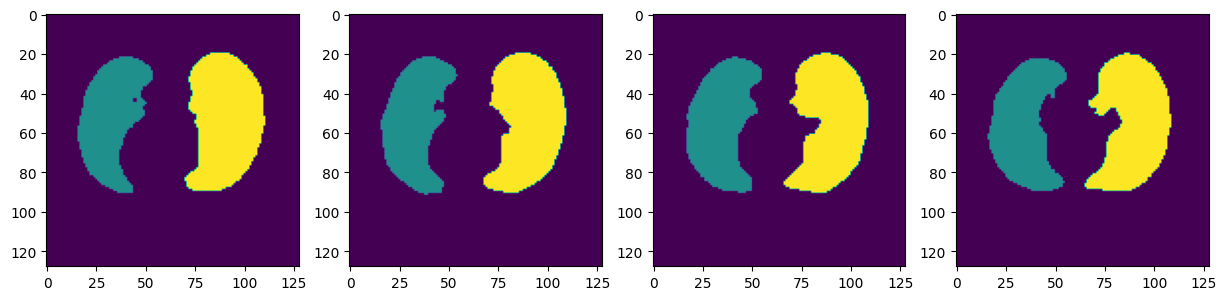

In [43]:
plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(1,4,(i+1))
    plt.imshow(CT_0_DATA_LungMask_1[0][15+i,:,:])



# Extract The Lung only

In [44]:
####################### extraxt the real part of lung

def apply_lung_mask(ct_img_array, lung_mask):
    ct_lung_seg = ct_img_array.copy()
    ct_lung_seg[lung_mask == 0] = 0
    return ct_lung_seg

def ExtrctRealPart(CT_Images,CT_ALL_DATA_LungMask_1):

    for i in tqdm(range(len(CT_ALL_DATA_LungMask_1))):
            CT_ALL_DATA_LungMask_1[i][CT_ALL_DATA_LungMask_1[i] != 0] = 1

    ##### reshape the mask data for equal size of real data
    for i in range(len(CT_Images)):
        CT_Images[i]=reshpe_pic(CT_Images[i])

    patient_ct_lung_seg=[]
    for i in range(len(CT_ALL_DATA_LungMask_1)):
        patient_ct_lung_seg.append(apply_lung_mask(CT_Images[i], CT_ALL_DATA_LungMask_1[i]))
    return  patient_ct_lung_seg

patient_ct_lung_seg = ExtrctRealPart(CT_0_Images,CT_0_DATA_LungMask_1)



100%|██████████| 100/100 [00:00<00:00, 2095.04it/s]


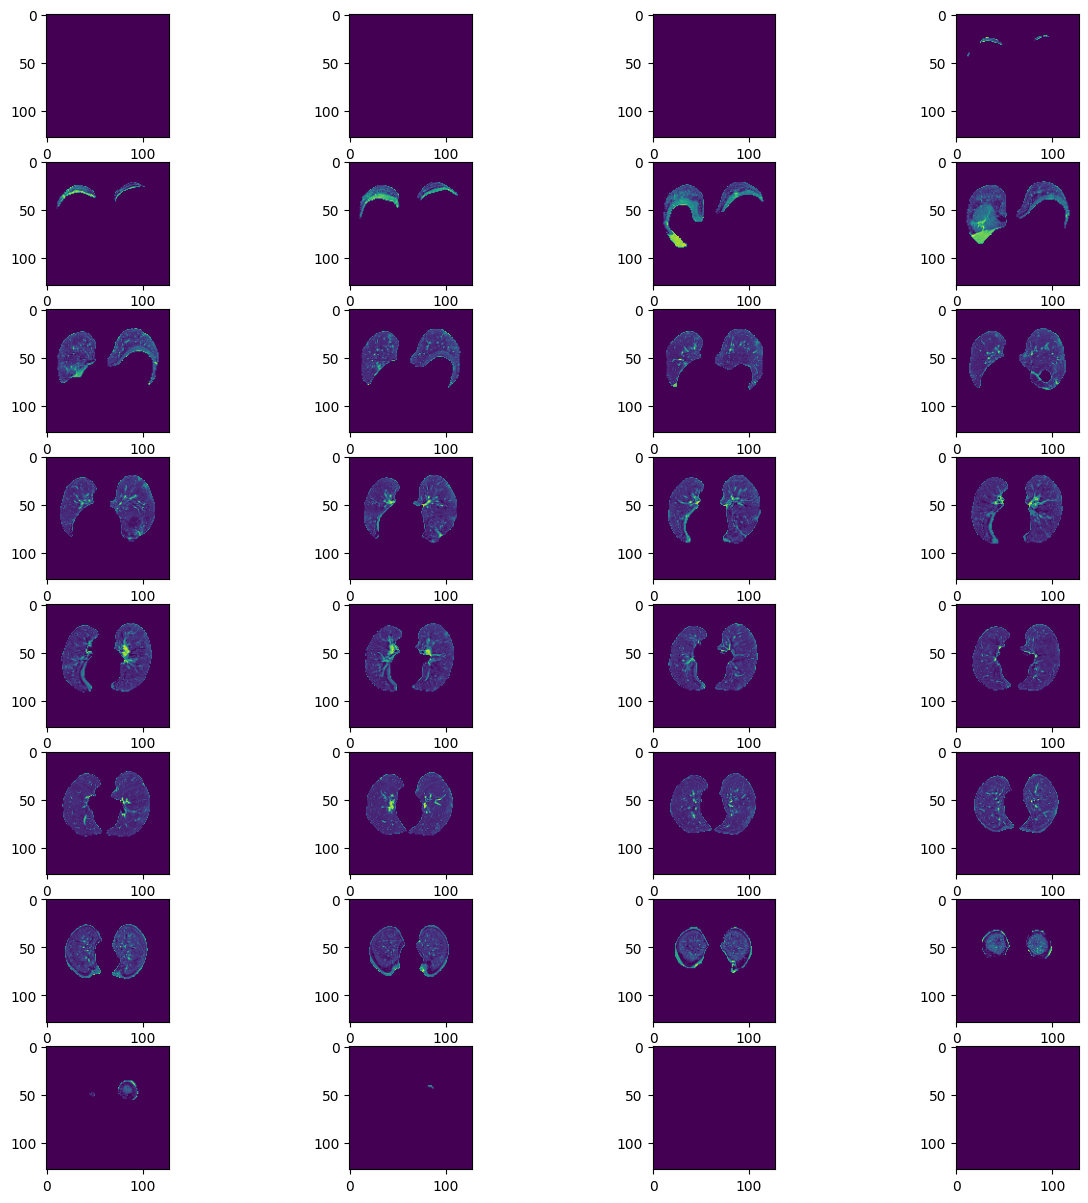

In [51]:
plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(1,4,(i+1))
    plt.imshow(patient_ct_lung_seg[0][15+i,:,:])


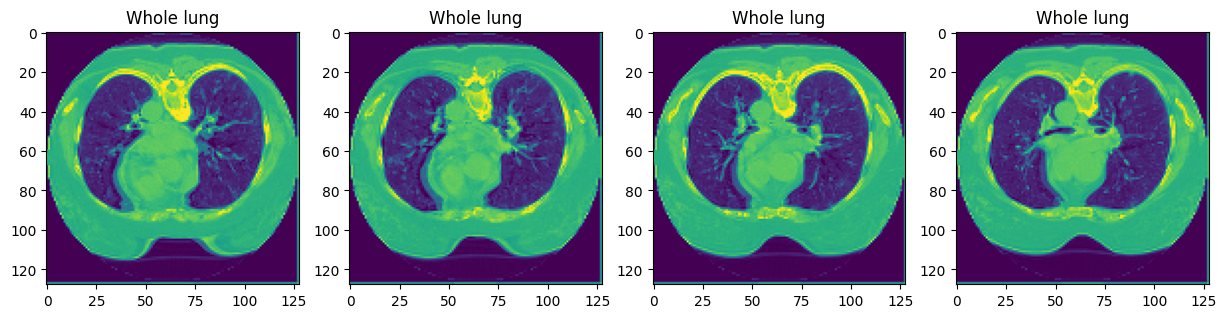

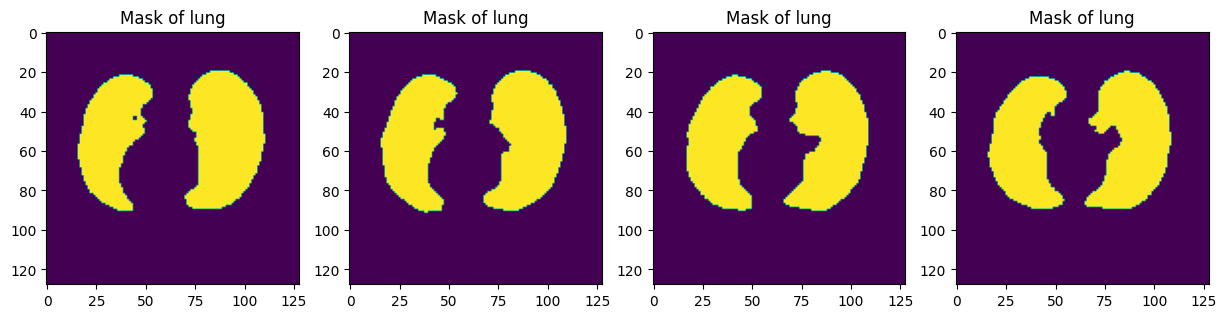

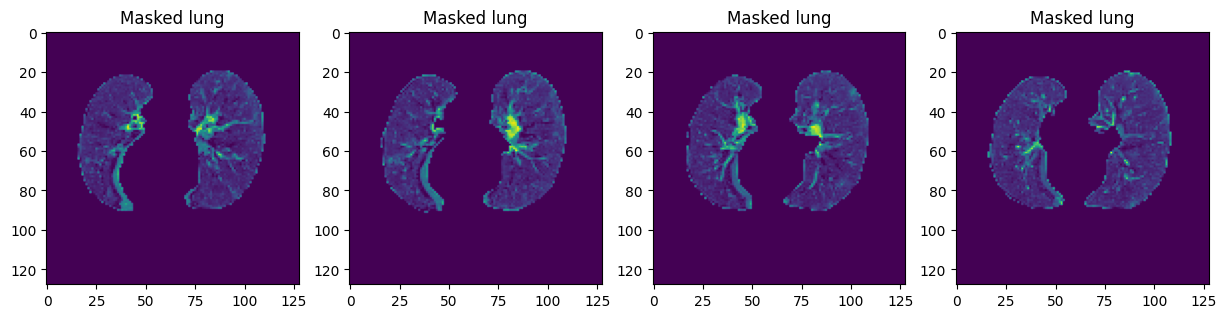

In [46]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(1,4,(i+1))
    plt.imshow(CT_0_Images[0][15+i,:,:])
    plt.title('Whole lung')

plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(1,4,(i+1))
    plt.imshow(CT_0_DATA_LungMask_1[0][15+i,:,:])
    plt.title('Mask of lung')

plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(1,4,(i+1))
    plt.imshow(patient_ct_lung_seg[0][15+i,:,:])
    plt.title('Masked lung')




#Cropping Process

In [47]:

########### remove rezo slices
import nibabel as nib
from skimage.transform import resize
from scipy import ndimage
from tqdm import tqdm
import pickle

def RemoveZeroSlices(CT_CuttedLung_Image_1, LungMasks, CT_Images):
    for i in range(CT_CuttedLung_Image_1.shape[0]):
        if CT_CuttedLung_Image_1[i, :, :].sum() != 0:
            start = i
            break

    ##### find final slice
    for i in range(CT_CuttedLung_Image_1.shape[0]):
        if CT_CuttedLung_Image_1[(CT_CuttedLung_Image_1.shape[0]) - i - 1, :, :].sum() != 0:
            stop = CT_CuttedLung_Image_1.shape[0] - i - 1
            break
    print("start:", start, "stop:", stop)
    return (
        CT_CuttedLung_Image_1[start:stop, :, :],
        LungMasks[start:stop, :, :],
        CT_Images[start:stop, :, :]
    )

################################ Define optimal border of a 2D slice
def SliceCrop(test_slice):
        ################################## Up
        UpperRow=0
        for i in range(test_slice.shape[0]):
        ##### UpperRow
            if(test_slice[i,:].sum()!=0):
                UpperRow= i
                break

        ################################## down
        LowerRow=0
        for i in range(test_slice.shape[0]):
            if(test_slice[(test_slice.shape[0])-i-1,:].sum()!=0):
                LowerRow= test_slice.shape[0]-i-1
                break

        ################################## left
        LeftCol=0
        for i in range(test_slice.shape[1]):
        ##### LeftCol
            if(test_slice[:,i].sum()!=0):
                LeftCol= i
                break

        ################################## Right
        RightCol=0
        for i in range(test_slice.shape[1]):
            if(test_slice[:,(test_slice.shape[1])-i-1].sum()!=0):
                RightCol= test_slice.shape[1]-i-1
                break
        # print("UpperRow:",UpperRow,"LowerRow:",LowerRow,"LeftCol:",LeftCol,"RightCol:",RightCol)
        return UpperRow,LowerRow,LeftCol,RightCol




 ########## for all slices exract optimal size
def BorderMaxSlices(CT_CuttedLung_Image_1):
    UpperRow=0
    LowerRow=0
    LeftCol=0
    RightCol=0

    MaxUpperRow=128
    MaxLowerRow=0
    MaxLeftCol=128
    MaxRightCol=0
    for i in range(CT_CuttedLung_Image_1.shape[0]):
            UpperRow,LowerRow,LeftCol,RightCol=SliceCrop(CT_CuttedLung_Image_1[i,:,:])
            # print("LeftCol:",LeftCol)
            if(MaxUpperRow>UpperRow): MaxUpperRow=UpperRow
            if(MaxLowerRow<LowerRow): MaxLowerRow=LowerRow
            if(MaxLeftCol>LeftCol): MaxLeftCol=LeftCol
            if(MaxRightCol<RightCol): MaxRightCol=RightCol
    return    MaxUpperRow,MaxLowerRow,MaxLeftCol,MaxRightCol

############## save the output data
def SaveData(Images,Masks,DirImages,DirMasks):
    ###### Cropped Images
    with open(DirImages+'.pickle', 'wb') as handle:
        pickle.dump(Images, handle, protocol=pickle.HIGHEST_PROTOCOL)

    ##### Cropped Masks
    with open(DirMasks+'.pickle', 'wb') as handle:
        pickle.dump(Masks, handle, protocol=pickle.HIGHEST_PROTOCOL)


######### final main function
def MainCropping(CT_CuttedLung_Images, LungMasks, CT_Images):
    ResiezedCTImages = []
    ResiezedLungMasks = []
    ResiezedBaseImage = []
    for i in tqdm(range(len(CT_CuttedLung_Images))):
        ########### Remove rezo slices
        Image, LungMask, BaseImage = RemoveZeroSlices(CT_CuttedLung_Images[i], LungMasks[i], CT_Images[i])

        ########## Define max size of each Case
        UpperRow, LowerRow, LeftCol, RightCol = BorderMaxSlices(Image)

        ######## Cutting the all slices based on new border
        Image = Image[:, UpperRow:LowerRow, LeftCol:RightCol]
        LungMask = LungMask[:, UpperRow:LowerRow, LeftCol:RightCol]
        BaseImage = BaseImage[:, UpperRow:LowerRow, LeftCol:RightCol]

        ####### Resize the images
        ResiezedCTImages.append(resize(Image, (32, 128, 128), anti_aliasing=True, order=5, mode='constant'))

        ####### Resize the LungMasks
        ResiezedLungMasks.append(resize(LungMask, (32, 128, 128), anti_aliasing=True, order=5, mode='constant'))

        ####### Resize the LungMasks
        ResiezedBaseImage.append(resize(BaseImage, (32, 128, 128), anti_aliasing=True, order=5, mode='constant'))

    return ResiezedCTImages, ResiezedLungMasks, ResiezedBaseImage


######### cropping process
Images, LungMasks, BaseImage = MainCropping(patient_ct_lung_seg, CT_0_DATA_LungMask_1, CT_0_Images)



  0%|          | 0/100 [00:00<?, ?it/s]

start: 3 stop: 29


  1%|          | 1/100 [00:03<06:29,  3.93s/it]

start: 2 stop: 29


  2%|▏         | 2/100 [00:06<05:13,  3.20s/it]

start: 1 stop: 29


  3%|▎         | 3/100 [00:09<04:48,  2.98s/it]

start: 1 stop: 28


  4%|▍         | 4/100 [00:12<04:34,  2.86s/it]

start: 1 stop: 30


  5%|▌         | 5/100 [00:16<05:10,  3.27s/it]

start: 4 stop: 29


  6%|▌         | 6/100 [00:19<05:11,  3.31s/it]

start: 6 stop: 27


  7%|▋         | 7/100 [00:22<04:47,  3.09s/it]

start: 3 stop: 28


  8%|▊         | 8/100 [00:24<04:33,  2.97s/it]

start: 3 stop: 29


  9%|▉         | 9/100 [00:27<04:23,  2.89s/it]

start: 4 stop: 28


 10%|█         | 10/100 [00:31<05:05,  3.39s/it]

start: 1 stop: 28


 11%|█         | 11/100 [00:34<04:48,  3.24s/it]

start: 0 stop: 31


 12%|█▏        | 12/100 [00:37<04:32,  3.09s/it]

start: 2 stop: 29


 13%|█▎        | 13/100 [00:40<04:19,  2.98s/it]

start: 2 stop: 29


 14%|█▍        | 14/100 [00:43<04:17,  3.00s/it]

start: 2 stop: 29


 15%|█▌        | 15/100 [00:47<04:48,  3.39s/it]

start: 2 stop: 27


 16%|█▌        | 16/100 [00:50<04:28,  3.20s/it]

start: 2 stop: 29


 17%|█▋        | 17/100 [00:53<04:12,  3.04s/it]

start: 1 stop: 28


 18%|█▊        | 18/100 [00:55<04:01,  2.94s/it]

start: 1 stop: 28


 19%|█▉        | 19/100 [00:59<04:14,  3.15s/it]

start: 0 stop: 28


 20%|██        | 20/100 [01:03<04:26,  3.34s/it]

start: 1 stop: 29


 21%|██        | 21/100 [01:06<04:11,  3.19s/it]

start: 4 stop: 26


 22%|██▏       | 22/100 [01:08<03:56,  3.03s/it]

start: 5 stop: 27


 23%|██▎       | 23/100 [01:11<03:45,  2.93s/it]

start: 1 stop: 27


 24%|██▍       | 24/100 [01:15<04:12,  3.32s/it]

start: 1 stop: 26


 25%|██▌       | 25/100 [01:18<04:07,  3.30s/it]

start: 2 stop: 26


 26%|██▌       | 26/100 [01:21<03:50,  3.11s/it]

start: 3 stop: 27


 27%|██▋       | 27/100 [01:24<03:37,  2.98s/it]

start: 3 stop: 29


 28%|██▊       | 28/100 [01:27<03:30,  2.92s/it]

start: 6 stop: 27


 29%|██▉       | 29/100 [01:31<04:02,  3.42s/it]

start: 3 stop: 28


 30%|███       | 30/100 [01:34<03:44,  3.20s/it]

start: 3 stop: 29


 31%|███       | 31/100 [01:37<03:30,  3.05s/it]

start: 5 stop: 28


 32%|███▏      | 32/100 [01:39<03:20,  2.95s/it]

start: 5 stop: 28


 33%|███▎      | 33/100 [01:42<03:20,  2.99s/it]

start: 4 stop: 29


 34%|███▍      | 34/100 [01:47<03:42,  3.37s/it]

start: 3 stop: 29


 35%|███▌      | 35/100 [01:49<03:25,  3.16s/it]

start: 4 stop: 29


 36%|███▌      | 36/100 [01:52<03:12,  3.00s/it]

start: 5 stop: 29


 37%|███▋      | 37/100 [01:55<03:02,  2.90s/it]

start: 6 stop: 27


 38%|███▊      | 38/100 [01:58<03:09,  3.06s/it]

start: 8 stop: 27


 39%|███▉      | 39/100 [02:02<03:22,  3.32s/it]

start: 3 stop: 29


 40%|████      | 40/100 [02:05<03:07,  3.13s/it]

start: 3 stop: 30


 41%|████      | 41/100 [02:07<02:56,  3.00s/it]

start: 0 stop: 29


 42%|████▏     | 42/100 [02:10<02:49,  2.92s/it]

start: 4 stop: 29


 43%|████▎     | 43/100 [02:14<03:03,  3.22s/it]

start: 6 stop: 30


 44%|████▍     | 44/100 [02:17<03:04,  3.30s/it]

start: 4 stop: 30


 45%|████▌     | 45/100 [02:20<02:51,  3.12s/it]

start: 2 stop: 29


 46%|████▌     | 46/100 [02:23<02:41,  2.99s/it]

start: 5 stop: 28


 47%|████▋     | 47/100 [02:25<02:33,  2.89s/it]

start: 5 stop: 27


 48%|████▊     | 48/100 [02:30<02:54,  3.35s/it]

start: 6 stop: 27


 49%|████▉     | 49/100 [02:33<02:46,  3.26s/it]

start: 5 stop: 28


 50%|█████     | 50/100 [02:36<02:33,  3.07s/it]

start: 2 stop: 28


 51%|█████     | 51/100 [02:38<02:24,  2.95s/it]

start: 1 stop: 28


 52%|█████▏    | 52/100 [02:41<02:19,  2.91s/it]

start: 4 stop: 27


 53%|█████▎    | 53/100 [02:46<02:39,  3.39s/it]

start: 7 stop: 28


 54%|█████▍    | 54/100 [02:48<02:25,  3.16s/it]

start: 3 stop: 27


 55%|█████▌    | 55/100 [02:51<02:15,  3.01s/it]

start: 8 stop: 27


 56%|█████▌    | 56/100 [02:54<02:07,  2.90s/it]

start: 4 stop: 26


 57%|█████▋    | 57/100 [02:57<02:06,  2.94s/it]

start: 5 stop: 30


 58%|█████▊    | 58/100 [03:01<02:20,  3.34s/it]

start: 8 stop: 28


 59%|█████▉    | 59/100 [03:03<02:08,  3.13s/it]

start: 8 stop: 31


 60%|██████    | 60/100 [03:06<01:59,  2.99s/it]

start: 5 stop: 28


 61%|██████    | 61/100 [03:09<01:53,  2.90s/it]

start: 3 stop: 29


 62%|██████▏   | 62/100 [03:12<01:56,  3.08s/it]

start: 0 stop: 29


 63%|██████▎   | 63/100 [03:16<02:03,  3.33s/it]

start: 5 stop: 28


 64%|██████▍   | 64/100 [03:19<01:52,  3.12s/it]

start: 0 stop: 29


 65%|██████▌   | 65/100 [03:22<01:44,  2.98s/it]

start: 5 stop: 29


 66%|██████▌   | 66/100 [03:24<01:38,  2.89s/it]

start: 0 stop: 29


 67%|██████▋   | 67/100 [03:28<01:44,  3.18s/it]

start: 0 stop: 28


 68%|██████▊   | 68/100 [03:32<01:45,  3.31s/it]

start: 3 stop: 28


 69%|██████▉   | 69/100 [03:34<01:36,  3.11s/it]

start: 3 stop: 27


 70%|███████   | 70/100 [03:37<01:30,  3.01s/it]

start: 1 stop: 28


 71%|███████   | 71/100 [03:40<01:24,  2.91s/it]

start: 4 stop: 28


 72%|███████▏  | 72/100 [03:44<01:35,  3.39s/it]

start: 3 stop: 29


 73%|███████▎  | 73/100 [03:47<01:28,  3.27s/it]

start: 5 stop: 28


 74%|███████▍  | 74/100 [03:50<01:20,  3.09s/it]

start: 6 stop: 27


 75%|███████▌  | 75/100 [03:53<01:14,  2.96s/it]

start: 7 stop: 28


 76%|███████▌  | 76/100 [03:56<01:10,  2.94s/it]

start: 7 stop: 27


 77%|███████▋  | 77/100 [04:00<01:18,  3.41s/it]

start: 6 stop: 27


 78%|███████▊  | 78/100 [04:03<01:09,  3.18s/it]

start: 7 stop: 27


 79%|███████▉  | 79/100 [04:05<01:03,  3.02s/it]

start: 3 stop: 29


 80%|████████  | 80/100 [04:08<00:58,  2.95s/it]

start: 1 stop: 29


 81%|████████  | 81/100 [04:12<00:59,  3.12s/it]

start: 4 stop: 29


 82%|████████▏ | 82/100 [04:16<01:00,  3.38s/it]

start: 4 stop: 29


 83%|████████▎ | 83/100 [04:18<00:54,  3.18s/it]

start: 2 stop: 26


 84%|████████▍ | 84/100 [04:21<00:48,  3.03s/it]

start: 7 stop: 28


 85%|████████▌ | 85/100 [04:24<00:43,  2.93s/it]

start: 0 stop: 29


 86%|████████▌ | 86/100 [04:28<00:45,  3.26s/it]

start: 5 stop: 30


 87%|████████▋ | 87/100 [04:31<00:43,  3.34s/it]

start: 4 stop: 29


 88%|████████▊ | 88/100 [04:34<00:37,  3.15s/it]

start: 4 stop: 27


 89%|████████▉ | 89/100 [04:37<00:33,  3.01s/it]

start: 1 stop: 30


 90%|█████████ | 90/100 [04:39<00:29,  2.97s/it]

start: 3 stop: 27


 91%|█████████ | 91/100 [04:44<00:31,  3.46s/it]

start: 1 stop: 28


 92%|█████████▏| 92/100 [04:49<00:31,  3.89s/it]

start: 5 stop: 27


 93%|█████████▎| 93/100 [04:53<00:26,  3.82s/it]

start: 3 stop: 28


 94%|█████████▍| 94/100 [04:55<00:20,  3.50s/it]

start: 4 stop: 30


 95%|█████████▌| 95/100 [04:59<00:17,  3.55s/it]

start: 3 stop: 28


 96%|█████████▌| 96/100 [05:03<00:14,  3.64s/it]

start: 1 stop: 30


 97%|█████████▋| 97/100 [05:06<00:10,  3.36s/it]

start: 0 stop: 29


 98%|█████████▊| 98/100 [05:08<00:06,  3.18s/it]

start: 0 stop: 30


 99%|█████████▉| 99/100 [05:11<00:03,  3.04s/it]

start: 6 stop: 29


100%|██████████| 100/100 [05:15<00:00,  3.16s/it]


# Plot Cropped Imges

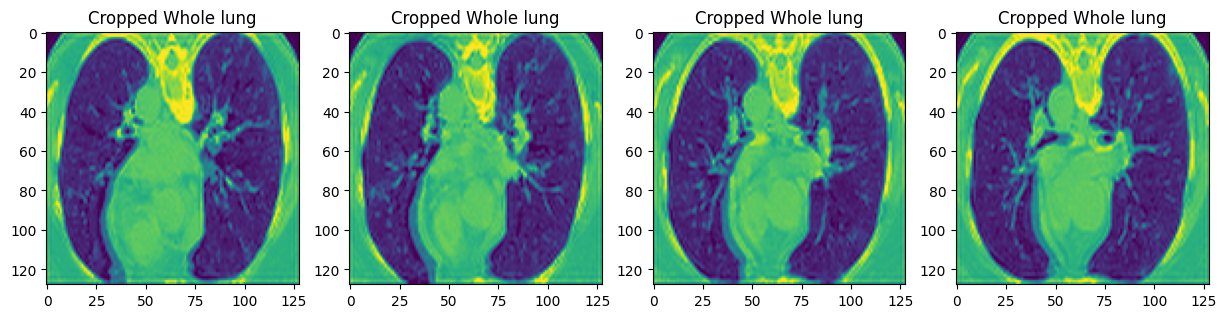

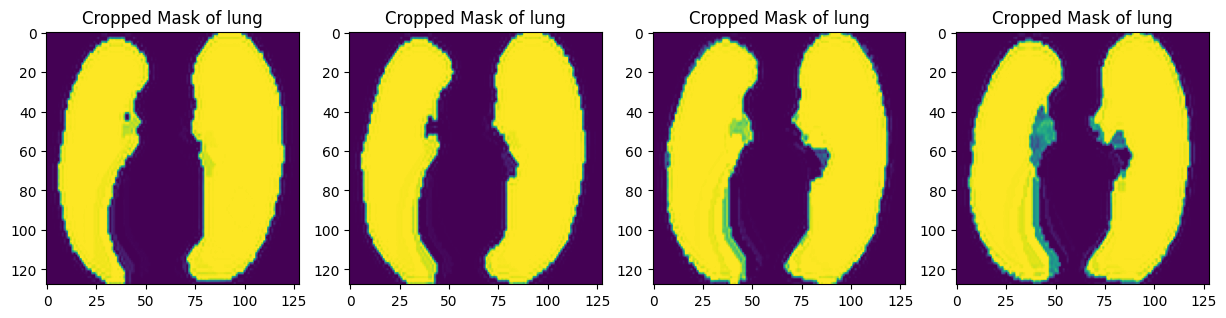

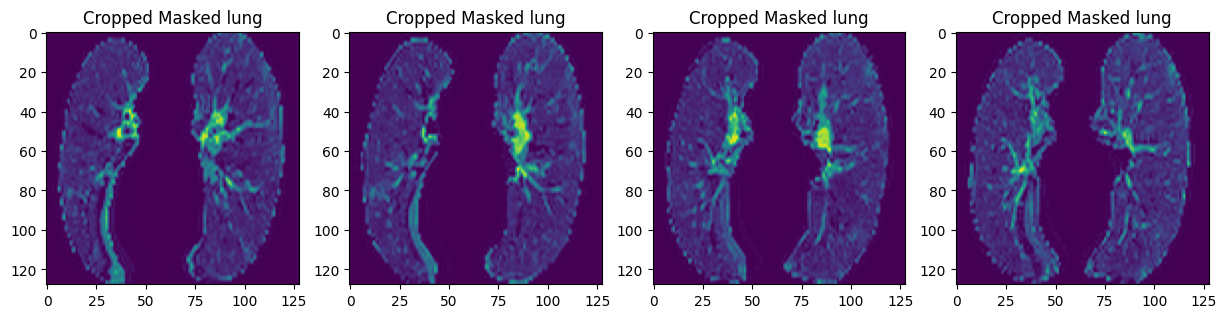

In [48]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(1,4,(i+1))
    plt.imshow(BaseImage[0][15+i,:,:])
    plt.title('Cropped Whole lung')

plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(1,4,(i+1))
    plt.imshow(LungMasks[0][15+i,:,:])
    plt.title('Cropped Mask of lung')

plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(1,4,(i+1))
    plt.imshow(Images[0][15+i,:,:])
    plt.title('Cropped Masked lung')



# Save The Data

In [49]:
def ConvListToNp(Images):
    Images_1 = np.zeros((len(Images),32,128,128))
    for i in range(len(Images)):
        Images_1[i,:,:,:] = Images[i]
    return Images_1


##### cutted data
Images = ConvListToNp(Images)
np.save('/content/drive/MyDrive/sortie_pre_all/4/LungImages.npy',Images)


###### Lung Masks
LungMasks = ConvListToNp(LungMasks)
np.save('/content/drive/MyDrive/sortie_pre_all/4/LungMask.npy',LungMasks)


####### Base CT images
BaseImage = ConvListToNp(BaseImage)
np.save('/content/drive/MyDrive/sortie_pre_all/4/BaseCTImages.npy',BaseImage)


# Sains merge



In [52]:
import os
import numpy as np

# Chemin vers le répertoire contenant les dossiers 1 et 2
repertoire_base = "/content/drive/MyDrive/finalMosmedDatasetPreProcessedSepareted/"

# Liste des dossiers à fusionner
dossiers_a_fusionner = [1, 2]

# Liste pour stocker les données fusionnées
lung_images_merged = []
lung_mask_merged = []
base_ct_images_merged = []

# Fusionner les données des dossiers spécifiés
for dossier_numero in dossiers_a_fusionner:
    dossier_path = os.path.join(repertoire_base, str(dossier_numero))

    # Charger les données à partir de chaque dossier
    lung_images = np.load(os.path.join(dossier_path, "LungImages.npy"))
    lung_mask = np.load(os.path.join(dossier_path, "LungMask.npy"))
    base_ct_images = np.load(os.path.join(dossier_path, "BaseCTImages.npy"))

    # Ajouter les données au tableau fusionné
    lung_images_merged.extend(lung_images)
    lung_mask_merged.extend(lung_mask)
    base_ct_images_merged.extend(base_ct_images)
print(len(lung_images_merged.shape))


AttributeError: ignored

In [56]:
lung_images_merged = ConvListToNp(lung_images_merged)
np.save('/content/drive/MyDrive/finalMosmedDatasetPreProcessedSepareted/merged/sain/LungImages.npy',lung_images_merged)

lung_mask_merged = ConvListToNp(lung_mask_merged)
np.save('/content/drive/MyDrive/finalMosmedDatasetPreProcessedSepareted/merged/sain/LungMask.npy',lung_mask_merged)

base_ct_images_merged = ConvListToNp(base_ct_images_merged)
np.save('/content/drive/MyDrive/finalMosmedDatasetPreProcessedSepareted/merged/sain/BaseCTImages.npy',base_ct_images_merged)


print(len(lung_images_merged))

254


# Malades merge

In [ ]:
import os
import numpy as np

# Chemin vers le répertoire contenant les dossiers 1 et 2
repertoire_base = "/content/drive/MyDrive/finalMosmedDatasetPreProcessedSepareted/"

# Liste des dossiers à fusionner
dossiers_a_fusionner = [3, 4, 5, 6, 7, 8, 9, 10, 11]

# Liste pour stocker les données fusionnées
lung_images_merged = []
lung_mask_merged = []
base_ct_images_merged = []

# Fusionner les données des dossiers spécifiés
for dossier_numero in dossiers_a_fusionner:
    dossier_path = os.path.join(repertoire_base, str(dossier_numero))

    # Charger les données à partir de chaque dossier
    lung_images = np.load(os.path.join(dossier_path, "LungImages.npy"))
    lung_mask = np.load(os.path.join(dossier_path, "LungMask.npy"))
    base_ct_images = np.load(os.path.join(dossier_path, "BaseCTImages.npy"))

    # Ajouter les données au tableau fusionné
    lung_images_merged.extend(lung_images)
    lung_mask_merged.extend(lung_mask)
    base_ct_images_merged.extend(base_ct_images)
print(len(lung_images_merged.shape))

In [ ]:
lung_images_merged = ConvListToNp(lung_images_merged)
np.save('/content/drive/MyDrive/finalMosmedDatasetPreProcessedSepareted/merged/malade/LungImages.npy',lung_images_merged)

lung_mask_merged = ConvListToNp(lung_mask_merged)
np.save('/content/drive/MyDrive/finalMosmedDatasetPreProcessedSepareted/merged/malade/LungMask.npy',lung_mask_merged)

base_ct_images_merged = ConvListToNp(base_ct_images_merged)
np.save('/content/drive/MyDrive/finalMosmedDatasetPreProcessedSepareted/merged/malade/BaseCTImages.npy',base_ct_images_merged)


print(len(lung_images_merged))